### Importação dos dados



In [30]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [31]:
faturamentos = {
    'Loja 1': loja['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

# Mostrando o faturamento de cada loja
for loja, faturamento in faturamentos.items():
  print(f'Faturamento da {loja}: R$ {faturamento:,.2f}')


Faturamento da Loja 1: R$ 1,534,509.12
Faturamento da Loja 2: R$ 1,488,459.06
Faturamento da Loja 3: R$ 1,464,025.03
Faturamento da Loja 4: R$ 1,384,497.58


In [32]:
loja_maior_faturamento = max(faturamentos, key=faturamentos.get)

print(f'A loja que teve o maior faturamento foi a {loja_maior_faturamento} com um valor de R$ {faturamentos[loja_maior_faturamento]:,.2f}')

A loja que teve o maior faturamento foi a Loja 1 com um valor de R$ 1,534,509.12


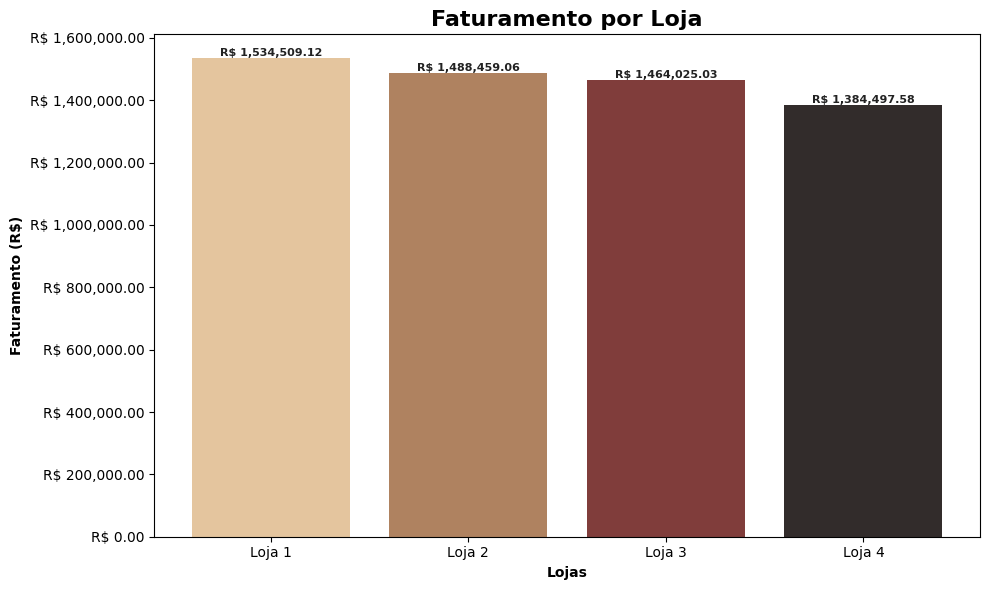

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
cores = ['#E4C59E', '#AF8260', '#803D3B', '#322C2B' ]


plt.figure(figsize=(10,6))
plt.bar(faturamentos.keys(), faturamentos.values(), color=cores)


plt.xlabel('Lojas', fontweight='bold')
plt.ylabel('Faturamento (R$)', fontweight='bold')
plt.title('Faturamento por Loja', fontsize=16, fontweight='bold')

# Função para formatar os valores como moeda
def formatar_moeda(x, pos):
    return f'R$ {x:,.2f}'
# Aplicando o formato de moeda no eixo Y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_moeda))


plt.tight_layout()

# Exibindo os valores de faturamento nas barras
for loja, faturamento in faturamentos.items():
    plt.text(loja, faturamento, f'R$ {faturamento:,.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold', color='#222222')

plt.show()


# 2. Vendas por Categoria


In [ ]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']


for loja in lojas:
  loja['Categoria do Produto'] = loja['Categoria do Produto'].str.capitalize()

# Criação do dicionário 'qtd_prod_categ', onde:
# - As chaves são os nomes das lojas (Loja 1, Loja 2, etc.)
# - Os valores são o resultado de 'value_counts()' para contar a quantidade de produtos por categoria em cada loja
# O dicionário é criado utilizando uma compreensão de lista (list comprehension)
qtd_prod_categ = {
    nomes_lojas[i]: lojas[i]['Categoria do Produto'].value_counts()  # Conta os produtos por categoria para cada loja
    for i in range(len(lojas))  # Itera sobre a lista 'lojas' e 'nomes_lojas' usando o índice 'i'
}


print('Quantidade de produtos por categoria')
for loja, qtd_prod in qtd_prod_categ.items():
  print(f'{loja}: ')
  print(qtd_prod)
  print()


Quantidade de produtos por categoria
Loja 1: 
Categoria do Produto
Moveis                   465
Eletronicos              448
Brinquedos               324
Eletrodomesticos         312
Esporte e lazer          284
Instrumentos musicais    182
Livros                   173
Utilidades domesticas    171
Name: count, dtype: int64

Loja 2: 
Categoria do Produto
Moveis                   442
Eletronicos              422
Brinquedos               313
Eletrodomesticos         305
Esporte e lazer          275
Instrumentos musicais    224
Livros                   197
Utilidades domesticas    181
Name: count, dtype: int64

Loja 3: 
Categoria do Produto
Moveis                   499
Eletronicos              451
Brinquedos               315
Eletrodomesticos         278
Esporte e lazer          277
Livros                   185
Instrumentos musicais    177
Utilidades domesticas    177
Name: count, dtype: int64

Loja 4: 
Categoria do Produto
Moveis                   480
Eletronicos              451
Brinqued

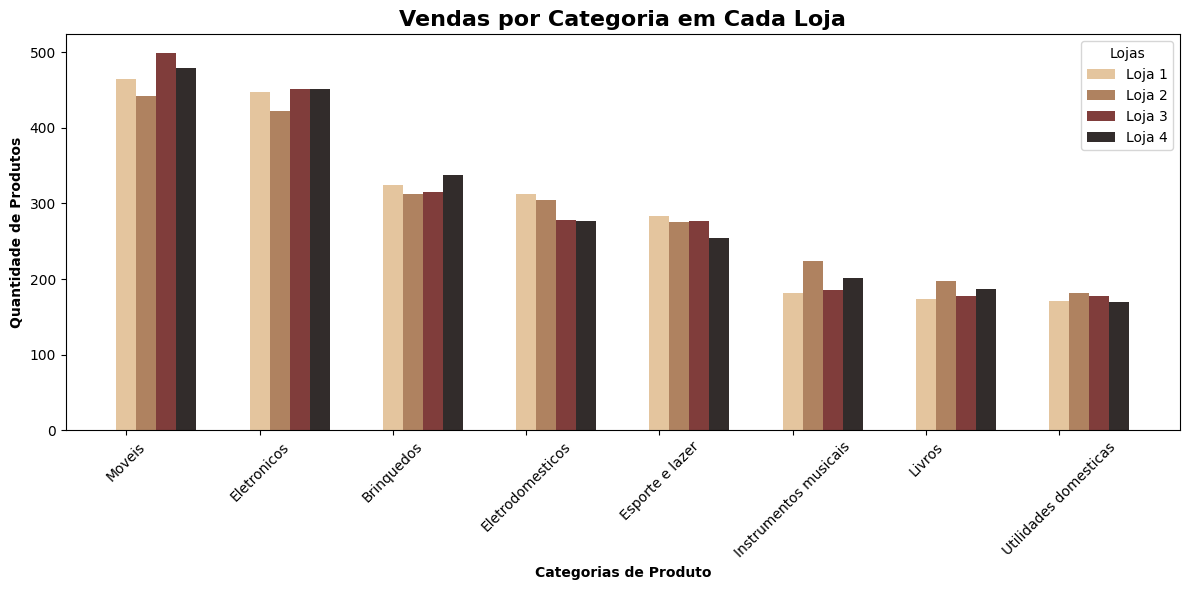

In [ ]:
import matplotlib.pyplot as plt
num_lojas = len(nomes_lojas)
cores = ['#E4C59E', '#AF8260', '#803D3B', '#322C2B' ]

plt.figure(figsize=(12, 6))
largura_barra = 0.15

# Para cada loja, criamos uma barra correspondente
for i, loja in enumerate(nomes_lojas):
    # A posição das barras de cada loja é ajustada com um pequeno deslocamento para não sobrepor
    plt.bar([x + i * largura_barra for x in range(len(qtd_prod_categ['Loja 1']))], qtd_prod_categ[loja], largura_barra, label=loja, color=cores[i])

plt.xlabel('Categorias de Produto', fontweight='bold')
plt.ylabel('Quantidade de Produtos', fontweight='bold')
plt.title('Vendas por Categoria em Cada Loja', fontsize=16, fontweight='bold')

# Definindo as categorias de produto como rótulos no eixo X
plt.xticks(range(len(qtd_prod_categ['Loja 1'])), qtd_prod_categ['Loja 1'].index, rotation=45)

plt.legend(title='Lojas')

# Ajustando o layout para não cortar o gráfico
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
def calcular_media(df:pd.DataFrame) -> float:
  try:
    media = round(df['Avaliação da compra'].mean(),2)
    return media
  except:
    print('Erro ao calcular média')
    return 0.0


for nome, loja in zip(nomes_lojas, lojas):
  print(f'Média de avaliação da {nome}: {calcular_media(loja):.2f}')

Média de avaliação da Loja 1: 3.98
Média de avaliação da Loja 2: 4.04
Média de avaliação da Loja 3: 4.05
Média de avaliação da Loja 4: 4.00


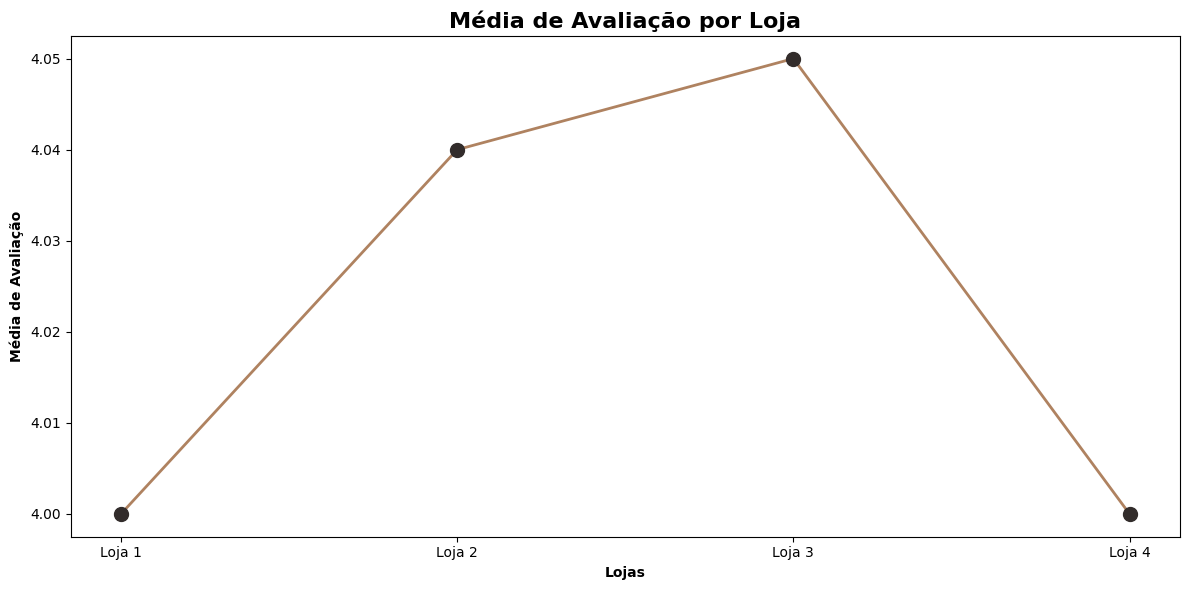

In [ ]:
import matplotlib.pyplot as plt

media_avaliacao = {nome: calcular_media(loja) for nome, loja in zip(nomes_lojas, lojas)}

# Criando o gráfico de pontos (scatter plot)
plt.figure(figsize=(12,6))
plt.scatter(nomes_lojas, media_avaliacao.values(), color='#322C2B', s=100, zorder=5)

# Adicionando a linha conectando os pontos
plt.plot(nomes_lojas, media_avaliacao.values(), color='#AF8260', linestyle='-', linewidth=2, zorder=3)

# Definindo título e rótulos
plt.title('Média de Avaliação por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontweight='bold')
plt.ylabel('Média de Avaliação', fontweight='bold')

# Ajustando layout e exibindo o gráfico
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [34]:
# Listas para armazenar os produtos mais e menos vendidos de cada loja
produtos_mais_vendidos = []
produtos_menos_vendidos = []
vendas_mais = []
vendas_menos = []


# Calculando os produtos mais e menos vendidos para cada loja
for i, loja in enumerate(lojas, start=1):
    print(f'\nLoja {i}')
    vendas = loja['Produto'].value_counts().sort_values(ascending=False)

    if vendas.empty:
        print("Nenhum produto vendido.")
        produtos_mais_vendidos.append(f"Sem Vendas (L{i})")
        produtos_menos_vendidos.append(f"Sem Vendas (L{i})")
        vendas_mais.append(0)
        vendas_menos.append(0)
    else:
        print("Produto mais vendido:", vendas.index[0], "-", vendas.iloc[0], "vendas")
        print("Produto menos vendido:", vendas.index[-1], "-", vendas.iloc[-1], "vendas")

        produtos_mais_vendidos.append(f"{vendas.index[0]} (Loja {i})")
        produtos_menos_vendidos.append(f"{vendas.index[-1]} (Loja {i})")
        vendas_mais.append(vendas.iloc[0])
        vendas_menos.append(vendas.iloc[-1])


Loja 1
Produto mais vendido: Micro-ondas - 60 vendas
Produto menos vendido: Celular ABXY - 33 vendas

Loja 2
Produto mais vendido: Iniciando em programação - 65 vendas
Produto menos vendido: Jogo de tabuleiro - 32 vendas

Loja 3
Produto mais vendido: Kit banquetas - 57 vendas
Produto menos vendido: Blocos de montar - 35 vendas

Loja 4
Produto mais vendido: Cama box - 62 vendas
Produto menos vendido: Guitarra - 33 vendas


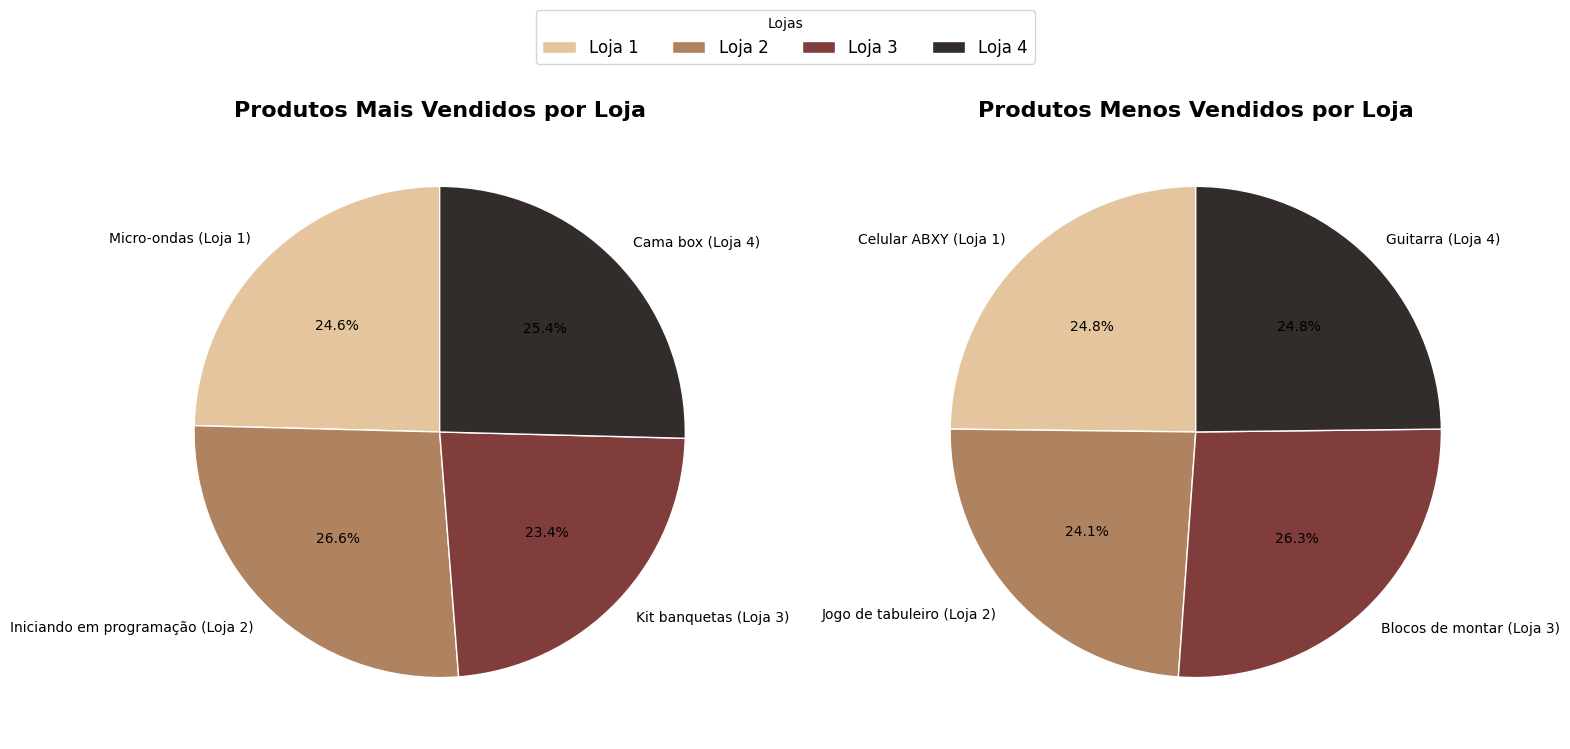

In [35]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['#E4C59E', '#AF8260', '#803D3B', '#322C2B' ]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.pie(vendas_mais, labels=produtos_mais_vendidos, autopct='%1.1f%%', startangle=90, colors=cores, wedgeprops={'edgecolor': 'white'})
ax1.set_title('Produtos Mais Vendidos por Loja', fontsize=16, fontweight='bold')

ax2.pie(vendas_menos, labels=produtos_menos_vendidos, autopct='%1.1f%%', startangle=90, colors=cores, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Produtos Menos Vendidos por Loja', fontsize=16, fontweight='bold')

# Adicionando a legenda com as cores das lojas
fig.legend(nomes_lojas, loc='lower center', ncol=4, bbox_to_anchor=(0.5, 0.95), fontsize=12, title='Lojas')

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:
lojas = [loja, loja2, loja3, loja4]
print('Custo médio de frete por loja')
for i, loja in enumerate(lojas, start=1):
  if 'Frete' in loja.columns:
    print(f'\nLoja {i}')
    frete_medio = loja['Frete'].mean()
    print(f'Frete médio: R$ {frete_medio:.2f}')
  else:
    print(f'Loja {i}: Coluna "Frete" não encontrada.')



Custo médio de frete por loja

Loja 1
Frete médio: R$ 31.28

Loja 2
Frete médio: R$ 33.62

Loja 3
Frete médio: R$ 33.07

Loja 4
Frete médio: R$ 31.28


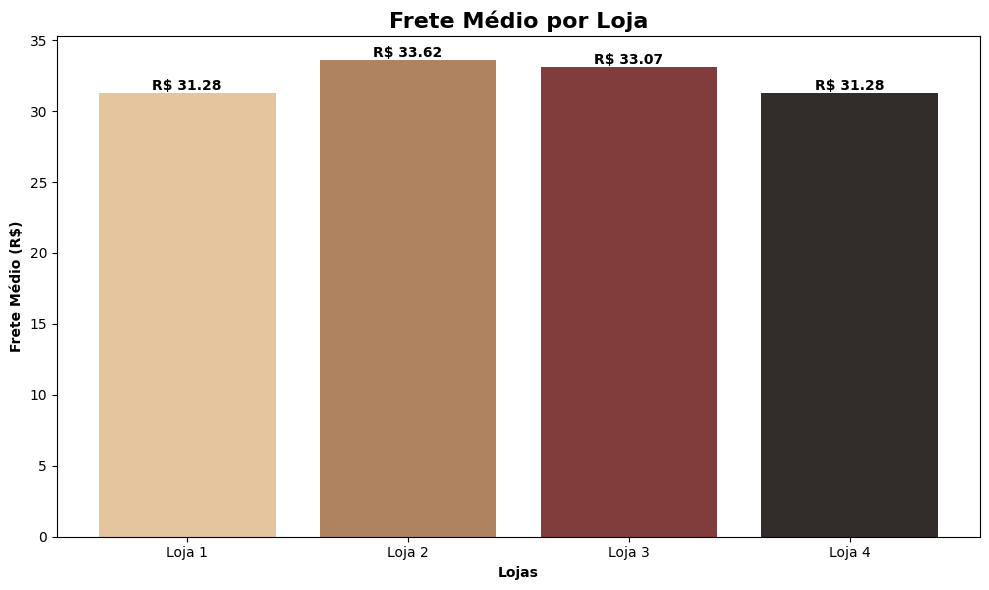

In [ ]:
import matplotlib.pyplot as plt
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores= ['#E4C59E', '#AF8260', '#803D3B', '#322C2B' ]

frete_medios = [loja['Frete'].mean() for loja in lojas]

plt.figure(figsize=(10,6))
plt.bar(nomes_lojas, frete_medios, color=cores)
plt.title('Frete Médio por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontweight='bold')
plt.ylabel('Frete Médio (R$)', fontweight='bold')

# Adicionando os valores em cima das barras
for i, valor in enumerate(frete_medios):
    plt.text(i, valor, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# **Relatório de Análise de Desempenho das Lojas**

## **Introdução**

Este relatório tem como objetivo analisar o desempenho de quatro lojas pertencentes ao Senhor João, com o intuito de recomendar qual delas deve ser vendida. Para isso, foram avaliados diversos aspectos de desempenho, incluindo o faturamento total, as categorias de produtos mais e menos vendidas, a média das avaliações dos clientes, os produtos mais e menos vendidos e o custo médio de frete em cada loja. A análise foi realizada com base nos dados fornecidos e visualizações geradas, permitindo uma compreensão clara dos pontos fortes e fracos de cada loja.



---


## **Desenvolvimento**

**Faturamento Total**

* Loja 1: R$ 1.534.509,12

* Loja 2: R$ 1.488.459,06

* Loja 3: R$ 1.464.025,03

* Loja 4: R$ 1.384.497,58
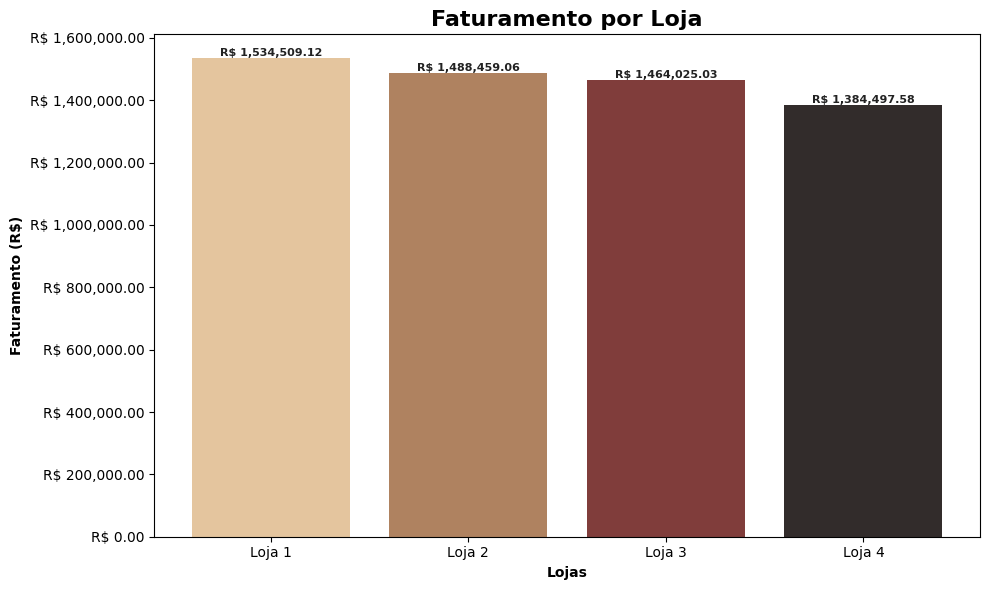

Entre as quatro lojas analisadas, a Loja 4 apresenta o menor faturamento, com R$ 1.384.497,58, ficando significativamente abaixo das demais unidades. Comparando:

* Loja 4 fatura cerca de R$ 150 mil a menos que a Loja 1 (R$ 1.534.509,12), o que representa uma diferença de aproximadamente 9,8%.  
* Em relação à Loja 2 (R$ 1.488.459,06), a diferença é de cerca de R$ 104 mil, ou aproximadamente 7% a menos.  
* Quando comparada à Loja 3 (R$ 1.464.025,03), a diferença é de quase R$ 80 mil, ou cerca de 5,5% menor.


Esses números reforçam que a Loja 4 está consideravelmente atrás das outras em termos de faturamento, evidenciando um desempenho financeiro inferior que pode indicar menor volume de vendas ou menor atratividade para os clientes.


---


**Vendas de Produtos por Categoria**

* Loja 1 apresenta uma distribuição equilibrada das vendas por categoria, com maior destaque para as categorias de Móveis (465 unidades vendidas) e Eletrônicos (448 unidades), seguidas por Brinquedos e Eletrodomésticos. Essa diversidade pode indicar um público amplo e um bom desempenho em diferentes segmentos.

* Loja 2 mantém um padrão semelhante, com as categorias de Móveis (442 unidades) e Eletrônicos (422 unidades) liderando as vendas, o que sugere foco em itens de maior valor agregado.

* Loja 3 tem um destaque ainda maior em Móveis (499 unidades vendidas), que é a categoria com maior volume, seguida por Eletrônicos (451 unidades). Essa concentração pode indicar uma especialização que beneficia a loja.

* Loja 4 apresenta menor volume em categorias como Eletrodomésticos (254 unidades) e Instrumentos Musicais (170 unidades), indicando uma menor diversidade de vendas e possível limitação no alcance de mercado nesses segmentos.

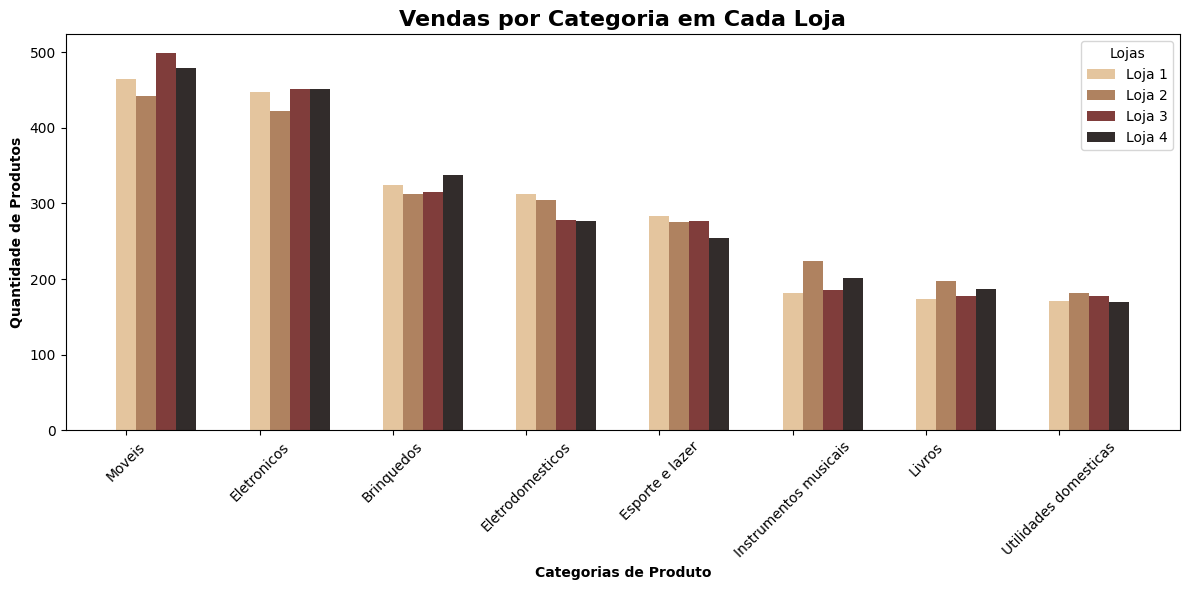

---


**Média de Avaliação dos Clientes**

* Loja 1: 3,98

* Loja 2: 4,04

* Loja 3: 4,05

* Loja 4: 4,00

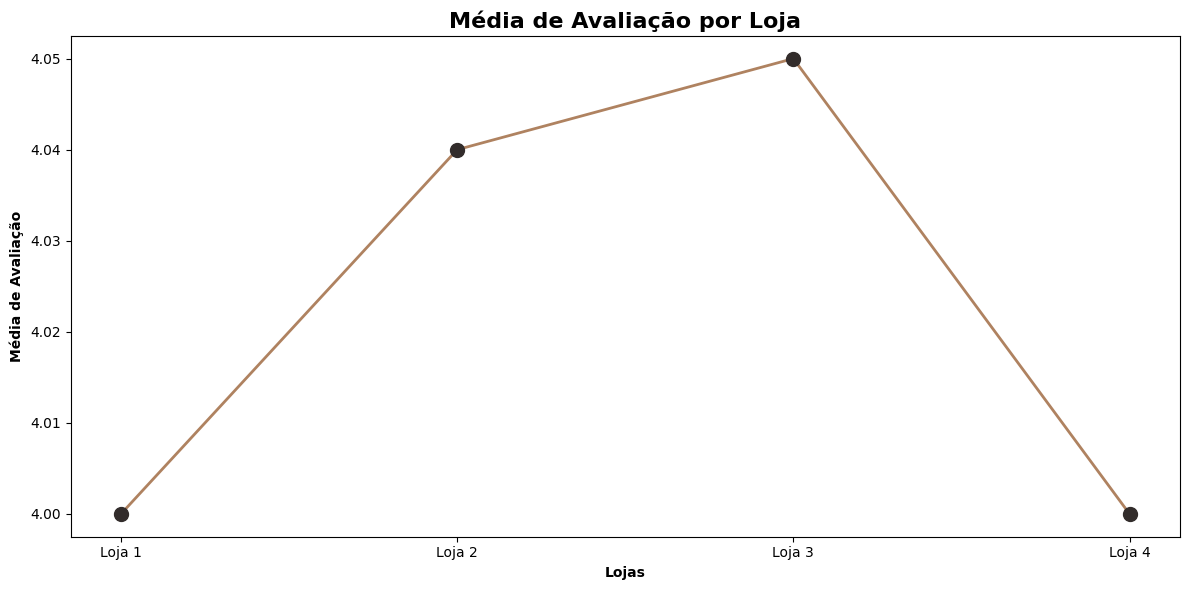

A Loja 3 destaca-se com a melhor avaliação média (4,05), sugerindo alta satisfação dos clientes, possivelmente devido à qualidade dos produtos ou ao atendimento. Em contraste, a Loja 4 apresenta uma média de 4,00, a segunda menor entre as lojas, o que pode indicar problemas na experiência do cliente.

A Loja 1, com uma avaliação de 3,98, está próxima da média da Loja 4, o que indica que, apesar de seu bom desempenho em faturamento, ainda há espaço para melhorar na satisfação do cliente. Esse aspecto deve ser analisado com atenção, pois uma boa avaliação impacta diretamente na fidelização de clientes.

---


**Produtos Mais e Menos Vendidos**

* Loja 1: Mais vendido - Micro-ondas (60 vendas), Menos vendido - Celular ABXY (33 vendas).

* Loja 2: Mais vendido - Iniciando em programação (65 vendas), Menos vendido - Jogo de tabuleiro (32 vendas).

* Loja 3: Mais vendido - Kit banquetas (57 vendas), Menos vendido - Blocos de montar (35 vendas).

* Loja 4: Mais vendido - Cama box (62 vendas), Menos vendido - Guitarra (33 vendas).

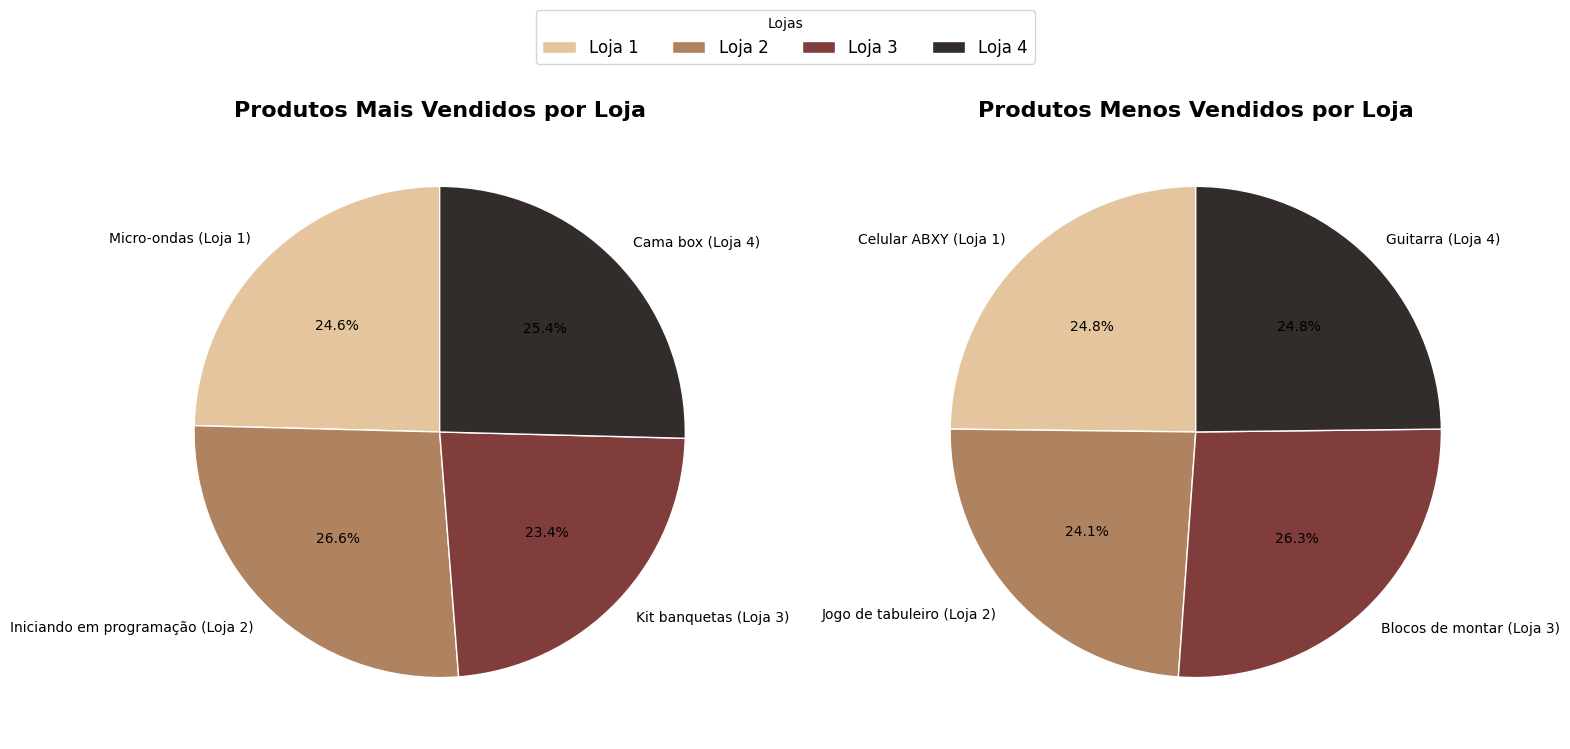

##Produtos mais vendidos:
* As lojas têm uma diversidade nos itens mais vendidos, refletindo o foco de cada uma em diferentes segmentos: eletrodomésticos (Loja 1), educação (Loja 2), móveis (Loja 3) e móveis de grande porte (Loja 4).

##Produtos menos vendidos:
* Os itens menos vendidos variam, mas todos são de categorias diferentes, o que sugere que o problema pode estar na demanda específica desses produtos em cada loja.

##Impacto no desempenho:

* A Loja 1, apesar do maior faturamento, possui um produto de tecnologia com baixo desempenho, o que pode ser uma oportunidade de ajuste no portfólio.

* A Loja 2 se destaca em produtos educacionais, um nicho com alta demanda.

* A Loja 3 é forte em móveis, mantendo uma boa avaliação dos clientes.

* A Loja 4, embora tenha o produto mais vendido (Cama Box), ainda apresenta o menor faturamento geral, indicando que a venda isolada de um produto não é suficiente para sustentar o desempenho da loja.



---


**Frete Médio por Loja**

* Loja 1: R$ 31,28

* Loja 2: R$ 33,62

* Loja 3: R$ 33,07

* Loja 4: R$ 31,28



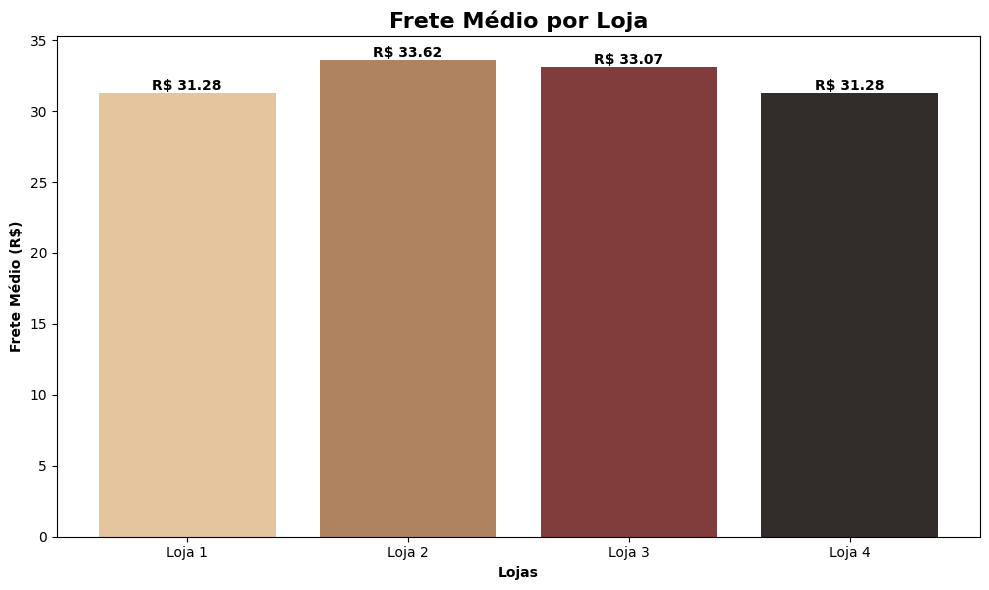

O custo médio de frete da Loja 4 é igual ao da Loja 1 (R$ 31,28). No entanto, a Loja 4 não apresenta diferenciais competitivos significativos no frete que possam compensar seu menor desempenho em outros aspectos.

---


# **Conclusão**

Com base na análise detalhada dos dados, a Loja 4 se destaca negativamente entre as quatro lojas avaliadas. Ela apresenta o menor faturamento (R$ 1.384.497,58), uma avaliação média de 4,00, que é a segunda menor entre as lojas, e uma menor diversidade de produtos em categorias estratégicas, como eletrodomésticos e instrumentos musicais.

Além disso, o frete médio da Loja 4 (R$ 31,28) é igual ao da Loja 1, mas sem oferecer qualquer vantagem competitiva em relação às demais lojas. Mesmo com o produto mais vendido (Cama Box com 62 unidades), o desempenho geral é insuficiente para compensar os pontos fracos identificados.

Diante disso, recomenda-se que o Senhor João considere a venda da Loja 4, concentrando seus esforços nas outras três lojas, que apresentam melhor desempenho, maior diversidade de produtos e avaliações mais favoráveis dos clientes. Essas lojas possuem maior potencial de crescimento e podem ser otimizadas para aumentar ainda mais a rentabilidade.